<a href="https://colab.research.google.com/github/aimlbits16/Project/blob/master/CapstoneProject-Preprocessing-Portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Healthcare claim analytics - Denial Claim Prediction**

# ![alt text](https://drive.google.com/uc?id=1QLNdyzs_QazDPAu7kUy4BxdnI5iWmd8f)

------------------------------------------------

![alt text](https://drive.google.com/uc?id=1Z0s8iQgssyvN7VO5MgKYAUYkdMxn-1QJ)

-----

![alt text](https://drive.google.com/uc?id=1eeQG-ZXTn4jf1lEwScDOboiTiY5TPiIt)

### Due to high processing power requirement for data used in this analysis, we are executing it in Google Colab

In [0]:
# Mounting the Google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Install Encoder libracry - category_encoders

In [2]:
! pip install category_encoders

     |████████████████████████████████| 81kB 6.0MB/s 


### Required dataset is in google drive project input data folder

In [0]:
InputFolder = '/content/gdrive/My Drive/capstone-project/input_data'
OutFolder = '/content/gdrive/My Drive/capstone-project/output_data'
inFile = InputFolder + '/ZCUPClaimDNA-History-Data-v2.xlsx'
pklFile = OutFolder + '/df_data.pkl'
rawpklFile = OutFolder + '/df_data_raw.pkl'
rejectionFile = OutFolder +'/Null-Claim-Number-Records.csv'
cleanFile = OutFolder +'/Clean_Data.csv'
cleanNoCatFile = OutFolder +'/Clean_NoCat_Data.csv'
IMAGES_PATH='/content/gdrive/My Drive/capstone-project/output_data/'

# Preprocessing / Data Preparation

### Importing Required Libraries

In [4]:
import sys
print('python:{}'.format(sys.version))
import os

import scipy as sp
print('scipy:{}'.format(sp.__version__))
import numpy as np
print('numpy:{}'.format(np.__version__))
import pandas as pd
print('pandas:{}'.format(pd.__version__))

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from category_encoders import BinaryEncoder

python:3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy:1.4.1
numpy:1.18.4
pandas:1.0.3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Reads - Required dataset is in google drive project input data folder

### Reading Data into Pandas Dataframe

In [5]:
print("Reading Main File")
df_history_dataset = pd.read_excel(inFile, 
                                   sheet_name='HistoryData',
                                   header=0,
                                   converters={'srlno':str, 
                                               'Claim.Number':str,
                                               'Claim.Line.Number':str,
                                               'Member.ID':str,
                                               'Provider.ID':str,
                                               'Revenue.Code':str,
                                               'Service.Code':str,
                                               'Place.Of.Service.Code':str,
                                               'Procedure.Code':str,
                                               'Diagnosis.Code':str,
                                               'Claim.Charge.Amount':np.float64,
                                               'Denial.Reason.Code':str,
                                               'In.Out.Of.Network':str,
                                               'Subscriber.Payment.Amount':np.float64,
                                               'Provider.Payment.Amount':np.float64,
                                               'Claim.Type':str,
                                               'Claim.Subscriber.Type':str,
                                               'Claim.Current.Status':str,
                                               'Network.ID':str,
                                               'Agreement.ID':str
                                              }, skipinitialspace=False,verbose=True,na_values=['None',''],na_filter=True,error_bad_lines=False).rename(columns=lambda x: x.strip())
print("Reading Labels File")
df_labels_dataset = pd.read_excel(inFile, 
                                  sheet_name='Accept-Denial-Label', 
                                  header=0,
                                  converters={'srlno':str, 
                                              'Label':str
                                             }, skipinitialspace=False,verbose=True,na_values=['None',''],na_filter=True,error_bad_lines=False).rename(columns=lambda x: x.strip())

print("Merging data frames")
df_data = pd.merge(df_history_dataset, df_labels_dataset, on='Srlno')
df_data.columns = df_data.columns.str.strip()

Reading Main File
Reading sheet HistoryData
Reading Labels File
Reading sheet Accept-Denial-Label
Merging data frames


### Pickling the Raw data Frame for using in case of reworks -to enable accelerated reads

In [6]:
df_data_raw = df_data.copy()
print("Pickling the Data Frame")
df_data.to_pickle(rawpklFile)
print("Pickled the Data Frame")
df_data.info()

Pickling the Data Frame
Pickled the Data Frame
<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Srlno                      472559 non-null  int64  
 1   Claim.Number               298536 non-null  object 
 2   Claim.Line.Number          472559 non-null  object 
 3   Member.ID                  472559 non-null  object 
 4   Provider.ID                472559 non-null  object 
 5   Revenue.Code               472559 non-null  object 
 6   Service.Code               472559 non-null  object 
 7   Place.Of.Service.Code      472559 non-null  object 
 8   Procedure.Code             472559 non-null  object 
 9   Diagnosis.Code             472559 non-null  object 
 10  Claim.Charge.Amount        472559 non-null  float64
 11  Denial.Reason.Code         472559 non-null  object 
 12  In.Out.Of.Network          472559 non-n

#### Picking from Pickle or raw data frame.

In [0]:
df_data = df_data_raw.copy()
df_data = pd.read_pickle(rawpklFile)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 21 columns):
Srlno                        472559 non-null int64
Claim.Number                 298536 non-null object
Claim.Line.Number            472559 non-null object
Member.ID                    472559 non-null object
Provider.ID                  472559 non-null object
Revenue.Code                 472559 non-null object
Service.Code                 472559 non-null object
Place.Of.Service.Code        472559 non-null object
Procedure.Code               472559 non-null object
Diagnosis.Code               472559 non-null object
Claim.Charge.Amount          472559 non-null float64
Denial.Reason.Code           472559 non-null object
In.Out.Of.Network            472559 non-null object
Subscriber.Payment.Amount    472559 non-null float64
Provider.Payment.Amount      472559 non-null float64
Claim.Type                   472559 non-null object
Claim.Subscriber.Type        472559 non-null object
Cla

###  Replace all Columns having blanks, just multiple white spaces with NAN

In [0]:
df_data.replace(r'^\s*$',np.NAN, regex=True,inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472559 entries, 0 to 472558
Data columns (total 21 columns):
Srlno                        472559 non-null int64
Claim.Number                 298536 non-null object
Claim.Line.Number            472559 non-null object
Member.ID                    472559 non-null object
Provider.ID                  472559 non-null object
Revenue.Code                 472203 non-null object
Service.Code                 472013 non-null object
Place.Of.Service.Code        403 non-null object
Procedure.Code               296928 non-null object
Diagnosis.Code               472559 non-null object
Claim.Charge.Amount          472559 non-null float64
Denial.Reason.Code           146529 non-null object
In.Out.Of.Network            267637 non-null object
Subscriber.Payment.Amount    472559 non-null float64
Provider.Payment.Amount      472559 non-null float64
Claim.Type                   472559 non-null object
Claim.Subscriber.Type        472559 non-null object
Claim.

In [0]:
#% of missing values in each column:
def find_missing_values_func(df):    # Input parameter is dataframe        
    mis_val = df.isnull().sum()        
    mis_val_percent = 100 * df.isnull().sum() / len(df)        
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
    mis_val_table_ren_columns = mis_val_table.rename(        
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
    mis_val_table_ren_columns = mis_val_table_ren_columns[            
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(        
        '% of Total Values', ascending=False).round(1)        
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"               
           "There are " + str(mis_val_table_ren_columns.shape[0]) +              
           " columns that have missing values.")        
    return mis_val_table_ren_columns

def drop_missing_values(df, percentage):
    columns = df.columns
    percent_missing = df.isnull().sum()*100/len(df)
    missing_value_df = pd.DataFrame({'column_name': columns, 'percent_missing':percent_missing})
    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    df = df.drop(missing_drop, axis=1)
    return df


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)



print(find_missing_values_func(df_data))

Your selected dataframe has 21 columns.
There are 9 columns that have missing values.
                       Missing Values  % of Total Values
Place.Of.Service.Code          472156               99.9
Denial.Reason.Code             326030               69.0
Network.ID                     206585               43.7
In.Out.Of.Network              204922               43.4
Agreement.ID                   204256               43.2
Procedure.Code                 175631               37.2
Claim.Number                   174023               36.8
Service.Code                      546                0.1
Revenue.Code                      356                0.1


In [0]:
print(df_data['Label'].value_counts())
print('Distribution:\n{}'.format((df_data['Label'].value_counts()/ df_data['Label'].count())*100))

0    470588
1      1971
Name: Label, dtype: int64
Distribution:
0    99.582909
1     0.417091
Name: Label, dtype: float64


### Claim number alongwith claim line number is the unique identifier that identifies each line in the data file uniquely. Any rows with blank claim number are bad data. Writing Blank Claim Numbers into a Separate File and deleting rows that do not have a claim number

In [0]:
print ('No. Of Claim Number that are Null or not provided:{0}'.format(df_data['Claim.Number'].isnull().sum()))
df_data[df_data['Claim.Number'].isnull()].to_csv(rejectionFile,index=False)

#Dropping Rows with a Blank Claim Number

df_data.drop(df_data[df_data['Claim.Number'].isnull()].index,axis=0,inplace=True)
df_data.info()

No. Of Claim Number that are Null or not provided:174023
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298536 entries, 0 to 472558
Data columns (total 21 columns):
Srlno                        298536 non-null int64
Claim.Number                 298536 non-null object
Claim.Line.Number            298536 non-null object
Member.ID                    298536 non-null object
Provider.ID                  298536 non-null object
Revenue.Code                 298365 non-null object
Service.Code                 298025 non-null object
Place.Of.Service.Code        170 non-null object
Procedure.Code               212449 non-null object
Diagnosis.Code               298536 non-null object
Claim.Charge.Amount          298536 non-null float64
Denial.Reason.Code           146529 non-null object
In.Out.Of.Network            267637 non-null object
Subscriber.Payment.Amount    298536 non-null float64
Provider.Payment.Amount      298536 non-null float64
Claim.Type                   298536 non-null object
C

### Creating a new column with Claim.Number and Claim.Line.Number and Deleting duplicate rows based on this new column

In [0]:
print ('No. Of Claim Number that are Null or not provided:{0}'.format(df_data['Claim.Number'].isnull().sum()))

df_data[df_data['Claim.Number'].duplicated(keep=False)]['Claim.Number'].count()
df_data['Claim.Number.Claim.Line.Number'] = df_data['Claim.Number'] + df_data['Claim.Line.Number']
duplicate_claim_number_claim_line_number = df_data[df_data['Claim.Number.Claim.Line.Number'].duplicated(keep=False)]
duplicate_count = duplicate_claim_number_claim_line_number['Claim.Number.Claim.Line.Number'].count()

print ('No Of Duplicate Rows =',duplicate_count)

df_data.drop(duplicate_claim_number_claim_line_number['Claim.Number.Claim.Line.Number'].index[1:duplicate_count],axis=0,inplace=True)
df_data.info()

No. Of Claim Number that are Null or not provided:0
No Of Duplicate Rows = 196
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298341 entries, 0 to 472558
Data columns (total 22 columns):
Srlno                             298341 non-null int64
Claim.Number                      298341 non-null object
Claim.Line.Number                 298341 non-null object
Member.ID                         298341 non-null object
Provider.ID                       298341 non-null object
Revenue.Code                      298170 non-null object
Service.Code                      297830 non-null object
Place.Of.Service.Code             170 non-null object
Procedure.Code                    212342 non-null object
Diagnosis.Code                    298341 non-null object
Claim.Charge.Amount               298341 non-null float64
Denial.Reason.Code                146436 non-null object
In.Out.Of.Network                 267444 non-null object
Subscriber.Payment.Amount         298341 non-null float64
Provider.Payme

### Rows with label zero (0 - Accepted) without any Denial.Reason.Code (blank) should be kept. Any row with label Zero with a value in Denial.Reason.Code (Not blank) should be Deleted

In [0]:
print(df_data[(df_data['Label'] == '0') & (df_data['Denial.Reason.Code'].notnull())][['Denial.Reason.Code','Label']].count())
print(df_data.groupby(['Label','Denial.Reason.Code'])['Denial.Reason.Code'].count())
df_data.drop(df_data[(df_data['Label'] == '0') & (df_data['Denial.Reason.Code'].notnull())].index,axis=0,inplace=True)
print(df_data.groupby(['Label','Denial.Reason.Code'])['Denial.Reason.Code'].count())

print(df_data[(df_data['Label'] == '0') & (df_data['Denial.Reason.Code'].notnull())][['Denial.Reason.Code','Label']].count())


### Finding missing values in each column in the data frame and distribution of records between the two labels

Your selected dataframe has 22 columns.
There are 8 columns that have missing values.
                       Missing Values  % of Total Values
Place.Of.Service.Code          298171               99.9
Denial.Reason.Code             151905               50.9
Procedure.Code                  85999               28.8
Network.ID                      32551               10.9
In.Out.Of.Network               30897               10.4
Agreement.ID                    30231               10.1
Service.Code                      511                0.2
Revenue.Code                      171                0.1
0    296370
1      1971
Name: Label, dtype: int64
Distribution:
0    99.339347
1     0.660653
Name: Label, dtype: float64


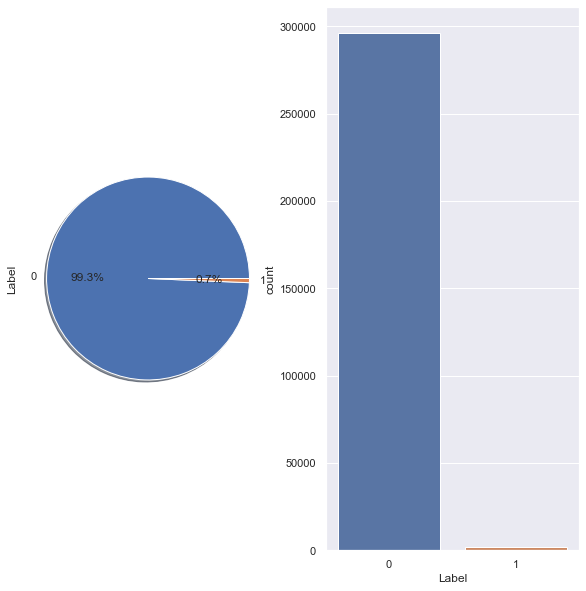

In [0]:
print(find_missing_values_func(df_data))
print(df_data['Label'].value_counts())
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
print('Distribution:\n{}'.format((df_data['Label'].value_counts()/ df_data['Label'].count())*100))
df_data['Label'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10), ax = ax[0]) 
sns.countplot(df_data['Label'], ax=ax[1])

### ** This clearly indicates that the dataset provided is imbalanced**

### **Analysis of Revenue code, Service Code, Diagnosis Code, Procedure Code**

### Lets look at the distribution of the Revenue.Code across all the categories available. Lets also look at the distribution of Revenue.Code by Label to understand which Revenue Codes contribute to the Label 0 and which contribute to Label 1


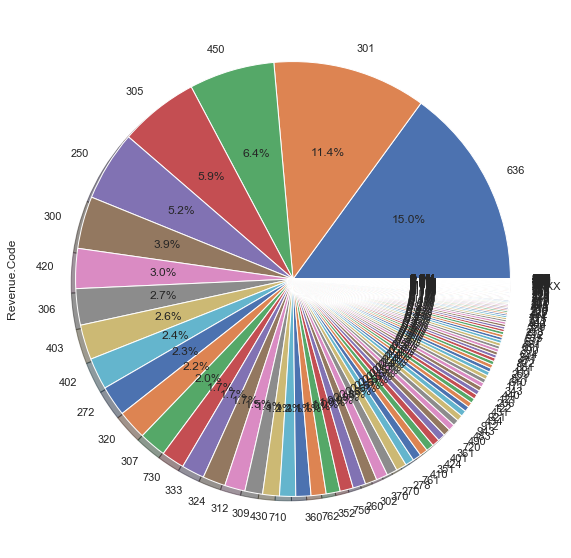

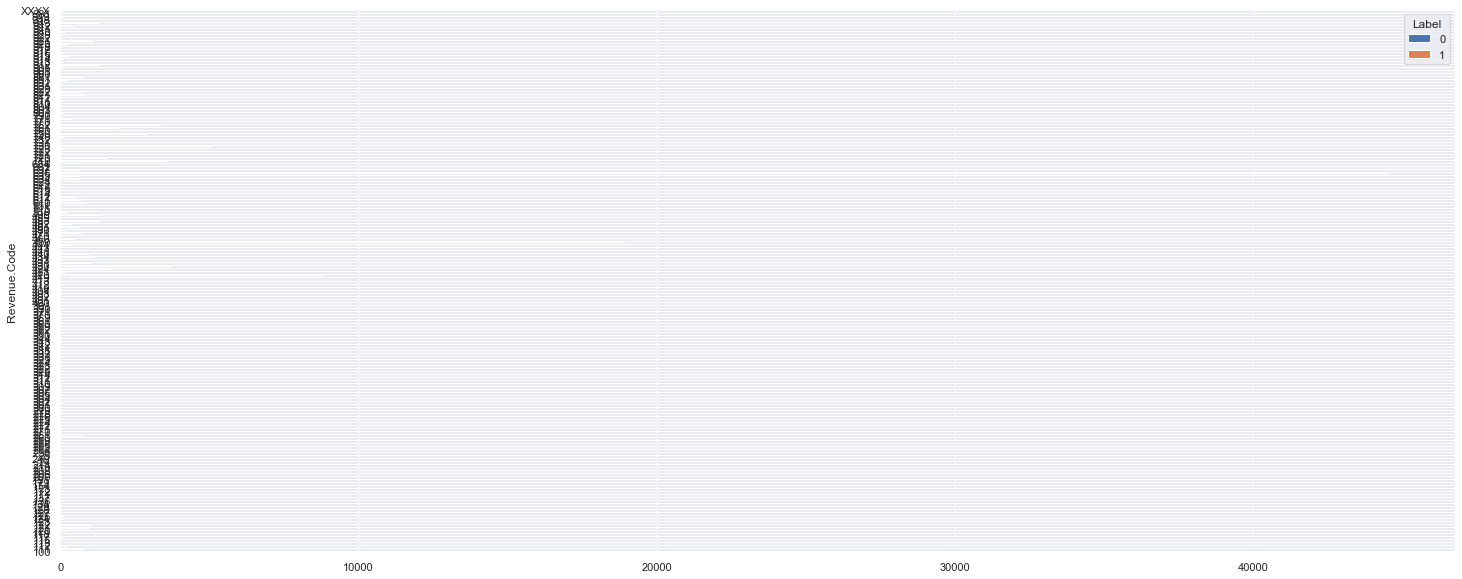

In [0]:
df_data['Revenue.Code'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))
pd.crosstab(df_data['Revenue.Code'],df_data['Label']).plot.barh(figsize=(25, 10))

### Project sponsor has provided grouping for Revenue Code. Applying grouping according to that.

2    265139
3     18817
1     14385
Name: Revenue.Code.Group, dtype: int64
Label  Revenue.Code.Group
0      1                      13239
       2                     264334
       3                      18797
1      1                       1146
       2                        805
       3                         20
Name: Revenue.Code.Group, dtype: int64


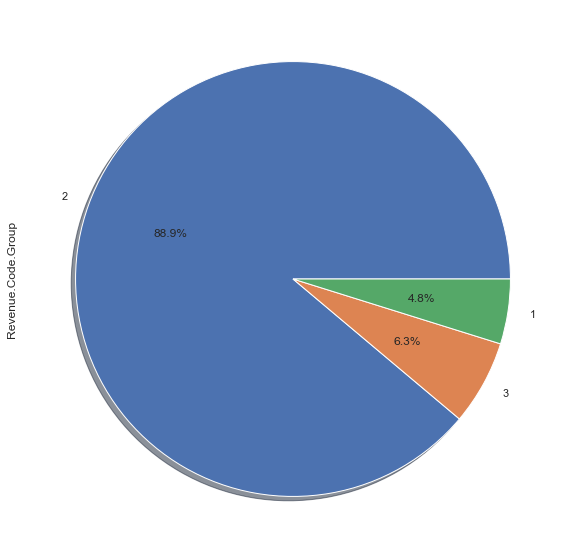

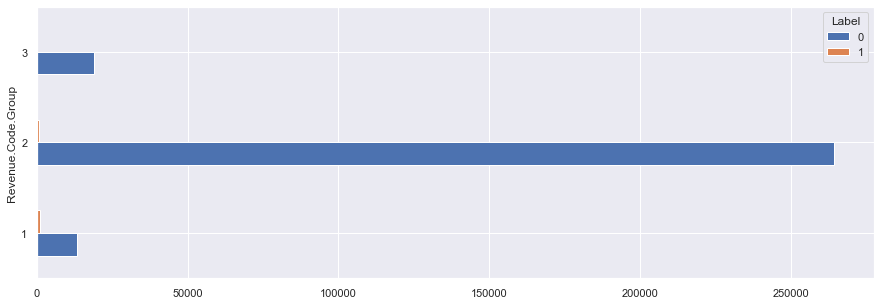

In [0]:
High_Revenue_Code = ["810", "811", "124", "261", "260", "331", "914", "174", "634", "173", "682", "126", "128", "172", "127", "200", "821", "134", "302", "740", "249", "270", "771", "361", "310", "434"]
Medium_Revenue_Code= ["210", "275", "122", "610", "206", "258", "444", "278", "117", "259", "121", "112", "276", "731", "750", "460", "360", "271", "730", "307", "424", "370", "250", "410", "940", "305", "350", "921", "480", "111", "351", "920", "636", "309", "300", "390", "301", "450", "440", "306", "311", "324", "710", "341", "272", "343", "942", "171", "482", "420", "490", "483", "312", "481", "352", "510", "402", "320", "720", "762", "761", "430", "403"]

df_data.loc[df_data['Revenue.Code'].isin(High_Revenue_Code), 'Revenue.Code.Group'] = "1"
df_data.loc[df_data['Revenue.Code'].isin(Medium_Revenue_Code), 'Revenue.Code.Group' ] = "2"
df_data.loc[~df_data['Revenue.Code'].isin(High_Revenue_Code + Medium_Revenue_Code), 'Revenue.Code.Group'] = "3"
print(df_data['Revenue.Code.Group'].value_counts())
print(df_data.groupby(['Label','Revenue.Code.Group'])['Revenue.Code.Group'].count())

#lets look at the distribution of the Revenue.Code.Group across all the categories available
df_data['Revenue.Code.Group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))

#lets look at the distribution of Revenue.Code by Label to understand which Revenue Codes contribute to the 
# Label 0 and which contribute to Label 1
pd.crosstab(df_data['Revenue.Code.Group'],df_data['Label']).plot.barh(figsize=(15, 5))

## Lets look at the distribution of the Service.Code across all the categories available and distribution of Service.Code by Label to understand which Revenue Codes contribute to the Label 0 and which contribute to Label 1

In [0]:
df_data['Service.Code'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))
pd.crosstab(df_data['Service.Code'],df_data['Label']).plot.barh(figsize=(25, 10))

### Project sponsor has provided grouping for Service Code. Applying grouping according to that.

2    214217
1     56805
3     27319
Name: Service.Code.Group, dtype: int64
Label  Service.Code.Group
0      1                      55707
       2                     213344
       3                      27319
1      1                       1098
       2                        873
Name: Service.Code.Group, dtype: int64


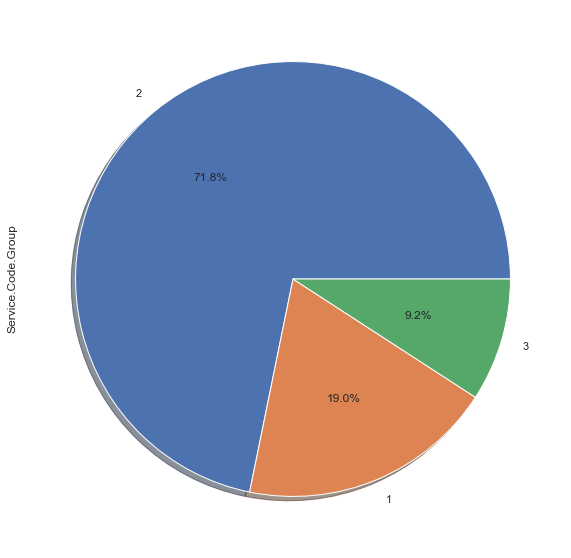

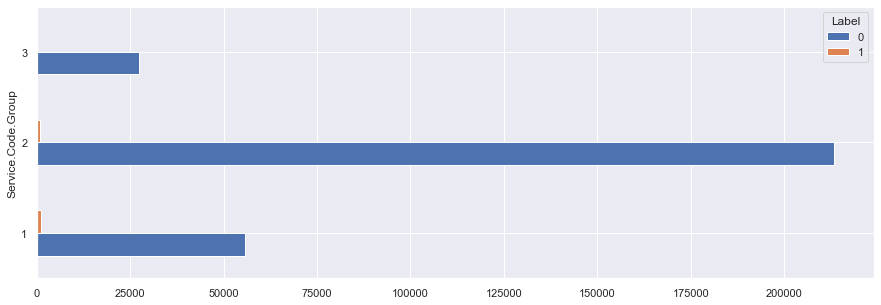

In [0]:
High_Service_Code = ["UNI", "RL8Y", "RM8W", "DU7O", "IH7O", "RM8I", "RI7Y", "SB7W", "GB7A", "NI7I", "OVV", "RM9I", "RR8I", "IMY", "RT8I", "RY8W", "RY7I", "IC7I", "SU7A", "ER7I"]
Medium_Service_Code = ["TO7W", "TE7O", "CC7I", "HV7I", "MR7O", "IN7I", "AL7I", "DI7O", "CT8Y", "RB7W", "RV8W", "CT7I", "RB8I", "RK8Y", "RB7I", "OE7I", "RY8I", "OP7O", "LA7O", "NS7I", "CL7O", "MR7Y", "ER7O", "CT7Y", "CT7O", "RA7O", "MD7O", "TH7O"]
df_data.loc[df_data['Service.Code'].isin(High_Service_Code), 'Service.Code.Group'] = '1'
df_data.loc[df_data['Service.Code'].isin(Medium_Service_Code), 'Service.Code.Group'] = '2'
df_data.loc[~df_data['Service.Code'].isin(High_Service_Code + Medium_Service_Code), 'Service.Code.Group'] = '3'
print(df_data['Service.Code.Group'].value_counts())
print(df_data.groupby(['Label','Service.Code.Group'])['Service.Code.Group'].count())


#lets look at the distribution of the Service.Code.Group across all the categories available
df_data['Service.Code.Group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))

#lets look at the distribution of Revenue.Code by Label to understand which Revenue Codes contribute to the 
# Label 0 and which contribute to Label 1
pd.crosstab(df_data['Service.Code.Group'],df_data['Label']).plot.barh(figsize=(15, 5))

### Lets look at the distribution of the Diagnosis.Code across all the categories available and distribution of Diagnosis.Code by Label to understand which Revenue Codes contribute to the Label 0 and which contribute to Label 1

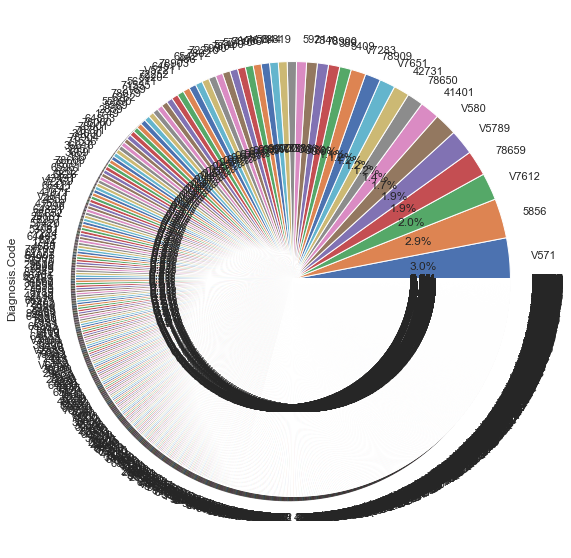

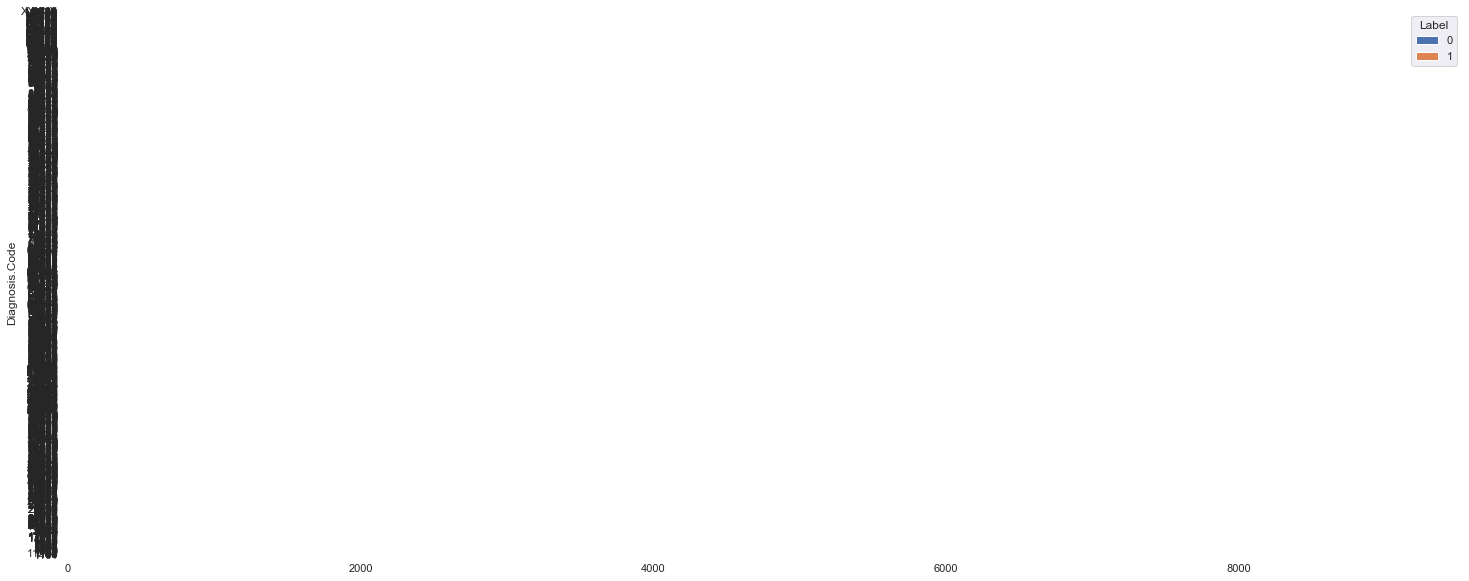

In [0]:
df_data['Diagnosis.Code'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))
pd.crosstab(df_data['Diagnosis.Code'],df_data['Label']).plot.barh(figsize=(25, 10))


### Project sponsor has provided grouping for Diagnosis Code. Applying grouping according to that. 

2    148789
3    146579
1      2973
Name: Diagnosis.Code.Group, dtype: int64
Label  Diagnosis.Code.Group
0      1                         2481
       2                       147323
       3                       146566
1      1                          492
       2                         1466
       3                           13
Name: Diagnosis.Code.Group, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298341 entries, 0 to 472558
Data columns (total 25 columns):
Srlno                             298341 non-null int64
Claim.Number                      298341 non-null object
Claim.Line.Number                 298341 non-null object
Member.ID                         298341 non-null object
Provider.ID                       298341 non-null object
Revenue.Code                      298170 non-null object
Service.Code                      297830 non-null object
Place.Of.Service.Code             170 non-null object
Procedure.Code                    212342 non-null object
Diagno

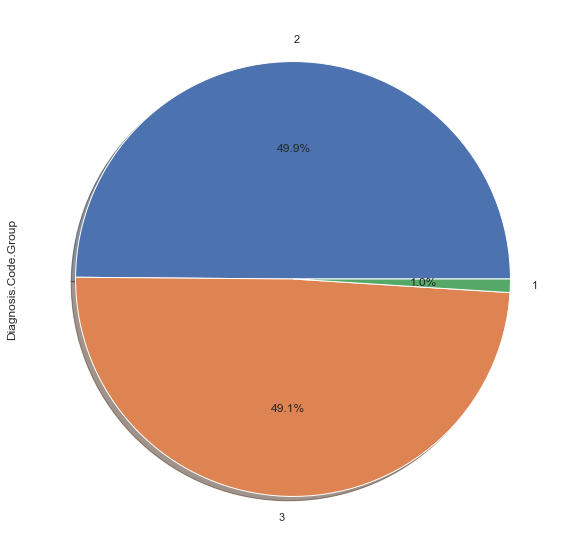

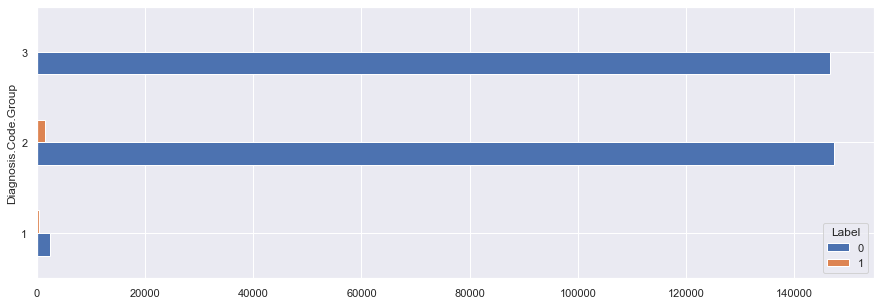

In [0]:
High_Diagnosis_Code = ["2929", "29690", "V202", "29663", "29622", "9962", "67524", "5193", "V045", "29530", "7999", "430", "29664", "5711", "79095", "30411", "29189", "6162", "29570", "29630", "29644", "5289", "20240", "99741", "37943", "9352", "V08", "V1255", "V5041", "80225", "6108", "57480", "5070", "V6284", "52460", "8024", "99681", "V3101"]
Medium_Diagnosis_Code = ["75249", "71100", "29660", "78722", "2273", "6868", "64844", "73671", "37730", "61804", "6146", "V5831", "2989", "7503", "72992", "29181", "2452", "80841", "8250", "66111", "9950", "29640", "9220", "99563", "7222", "29650", "65811", "29632", "52403", "99676", "27541", "4168", "2102", "2182", "0090", "34691", "5738", "68100", "2776", "1809", "5362", "29633", "29680", "61801", "34290", "72990", "64981", "2912", "6170", "1746", "6183", "78499", "52489", "53551", "42823", "30501", "3682", "V3000", "7226", "64303", "24200", "8832", "57470", "9726", "29689", "5409", "8248", "73730", "2181", "57450", "85011", "6121", "64893", "6253", "99883", "96501", "193", "53190", "6268", "42841", "226", "57400", "4280", "1960", "69589", "2777", "2180", "1743", "1742", "179", "6110", "6272", "60001", "53240", "V552", "6827", "5559", "6185", "8600", "81305", "07054", "0479", "45340", "6824", "5551", "38611", "5941", "2271", "72888", "80703", "6227", "6823", "6184", "4377", "62212", "72210", "2891", "5533", "5722", "8246", "V510", "6111", "2572", "2720", "5789", "55321", "3688", "2189", "2410", "1541", "5856", "65231", "6262", "5609", "5641", "7455", "1550", "2875", "220", "78720", "30300", "81209", "566", "99812", "56032", "4321", "1745", "78630", "5119", "5400", "34590", "57511", "30400", "4940", "5770", "25201", "75612", "78057", "6181", "61179", "1749", "27651", "73819", "78799", "00845", "56400", "99832", "5712", "4589", "42741", "78701", "4659", "57420", "30500", "7804", "30391", "5693", "1744", "6100", "41401", "55092", "5589", "61172", "99674", "1741", "61189", "49392", "82525", "9351", "V5331", "2910", "78901", "5303", "80126", "6271", "2141", "7842", "59970", "25002", "78791", "1748", "8500", "78900", "217", "1985", "79389", "42731", "78906", "99673", "7384", "78009", "650", "6210", "51881", "81342", "78659", "72402", "56210", "2851", "49322", "486", "55090", "2920", "56211", "V700", "57410", "4359", "5921", "03849", "78903", "53550", "7840", "2330", "64403", "33819", "6826", "78907", "V5811", "6202", "78652", "431", "V6759", "78079", "72252", "7802", "2809", "V7651", "7295", "78650", "65421", "0389", "43491", "78909", "2859", "V7611", "V7612", "3669", "V5789", "V571"]

df_data.loc[df_data['Diagnosis.Code'].isin(High_Diagnosis_Code), 'Diagnosis.Code.Group'] = '1'
df_data.loc[df_data['Diagnosis.Code'].isin(Medium_Diagnosis_Code), 'Diagnosis.Code.Group'] = '2',
df_data.loc[~df_data['Diagnosis.Code'].isin(High_Diagnosis_Code + Medium_Diagnosis_Code), 'Diagnosis.Code.Group'] = '3'
print(df_data['Diagnosis.Code.Group'].value_counts())
print(df_data.groupby(['Label','Diagnosis.Code.Group'])['Diagnosis.Code.Group'].count())

#lets look at the distribution of the Diagnosis.Code.Group across all the categories available
df_data['Diagnosis.Code.Group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))

#lets look at the distribution of Revenue.Code by Label to understand which Revenue Codes contribute to the 
# Label 0 and which contribute to Label 1
pd.crosstab(df_data['Diagnosis.Code.Group'],df_data['Label']).plot.barh(figsize=(15, 5))

df_data.info()


### Lets look at the distribution of the Procedure.Code across categories available

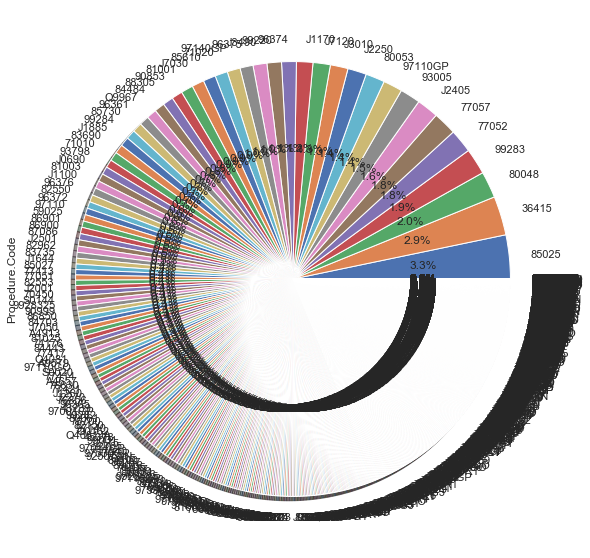

In [0]:
df_data['Procedure.Code'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))

### Treatements done on members do not require any procedure to be undertaken, but deleting the rows that have null values for the Procedure.Code is not advisable as the Claims without Procedure Code do have Label of 0 AND 1

In [0]:
print ('Number of Null Values in Procedure Code: {0}'.format(df_data['Procedure.Code'].isnull().sum()))
counts = df_data[df_data['Procedure.Code'].isnull()]['Label'].value_counts()
print ('Distribution of Procedure Code which has Null values by Label 0:{0}, Label 1:{1}'.format(counts[0],counts[1]))
df_data.loc[df_data['Procedure.Code'].isnull(),'Procedure.Code'] = 'Others'
print ('No Of Unique Procedure Codes:{0}'.format(df_data['Procedure.Code'].nunique()))

Number of Null Values in Procedure Code: 85999
Distribution of Procedure Code which has Null values by Label 0:85338, Label 1:661
No Of Unique Procedure Codes:3464


In [0]:
print ('Top 5 Procedure Code Distribution')
print (df_data['Procedure.Code'].value_counts()[:5])
df_data.info()

Top 5 Procedure Code Distribution
Others    85999
85025      6929
36415      6152
80048      4182
99283      4107
Name: Procedure.Code, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298341 entries, 0 to 472558
Data columns (total 25 columns):
Srlno                             298341 non-null int64
Claim.Number                      298341 non-null object
Claim.Line.Number                 298341 non-null object
Member.ID                         298341 non-null object
Provider.ID                       298341 non-null object
Revenue.Code                      298170 non-null object
Service.Code                      297830 non-null object
Place.Of.Service.Code             170 non-null object
Procedure.Code                    298341 non-null object
Diagnosis.Code                    298341 non-null object
Claim.Charge.Amount               298341 non-null float64
Denial.Reason.Code                146436 non-null object
In.Out.Of.Network                 267444 non-null object
Su

### Binning the Procedure.Code into 5 Groups 
Group 1 : Procedure Code : 85025
Group 2 : Procedure Code : 36415
Group 3 : Procedure Code : 80048
Group 4 : Procedure Code : 99283
Group 5 : Procedure Code : Others plus remaining

Distribution Of Procedure Code Group
5    276971
1      6929
2      6152
3      4182
4      4107
Name: Procedure.Code.Group, dtype: int64
Procedure.Code.Group  Label
1                     0          6924
                      1             5
2                     0          6147
                      1             5
3                     0          4179
                      1             3
4                     0          4105
                      1             2
5                     0        275015
                      1          1956
Name: Label, dtype: int64


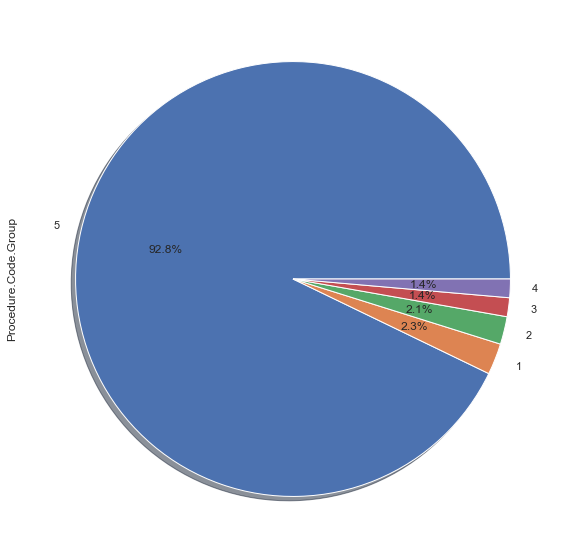

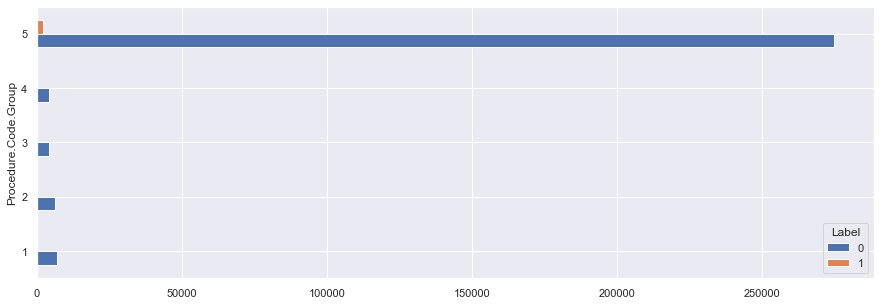

In [0]:
group_1 = ['85025']
group_2 = ['36415']
group_3 = ['80048']
group_4 = ['99283']
group_5 = ['Others']

df_data.loc[(df_data['Procedure.Code'].isin(group_1), 'Procedure.Code.Group')] = '1'
df_data.loc[(df_data['Procedure.Code'].isin(group_2), 'Procedure.Code.Group')] = '2'
df_data.loc[(df_data['Procedure.Code'].isin(group_3), 'Procedure.Code.Group')] = '3'
df_data.loc[(df_data['Procedure.Code'].isin(group_4), 'Procedure.Code.Group')] = '4'
df_data.loc[(df_data['Procedure.Code'].isin(group_5), 'Procedure.Code.Group')] = '5'

# Add the remaining to the Group 5
df_data.loc[(~df_data['Procedure.Code'].isin(group_1 + group_2 + group_3 + group_4 + group_5)), 'Procedure.Code.Group'] = '5'

#Lets see if the Binning/Grouping is done and what is the distribution of the Groups
print ('Distribution Of Procedure Code Group')
print (df_data['Procedure.Code.Group'].value_counts())

#lets look at the distribution of the Procedure.Code.Group across all the categories available
df_data['Procedure.Code.Group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,figsize=(10, 10))

#Lets see the distribution of Procedure Code Group by Label
print (df_data.groupby(['Procedure.Code.Group','Label'])['Label'].count())


#lets look at the distribution of Revenue.Code by Label to understand which Revenue Codes contribute to the 
# Label 0 and which contribute to Label 1
pd.crosstab(df_data['Procedure.Code.Group'],df_data['Label']).plot.barh(figsize=(15, 5))

## **Conclusion there are far too many categories and they need to be collapsed into 3/4 Groups either using the business logic provided by the Domain expert or using binning when no business logic is provided**

## Lets Identify the Outliers amoungst the Numeric Columns to understand the distribution

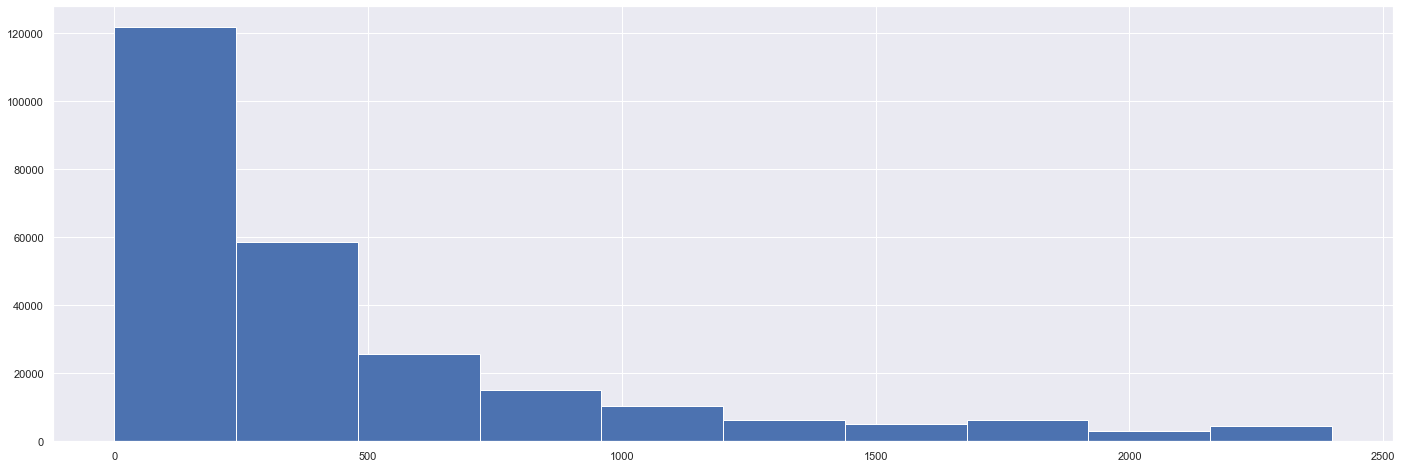

KeyError: 'Subscriber.Payment.Amount'

In [0]:
df_data['Claim.Charge.Amount'].hist()
plt.show()
df_data['Subscriber.Payment.Amount'].hist()
plt.show()
df_data['Provider.Payment.Amount'].hist()
plt.show()


Total Number of rows where Claim Amount is zero :9
Total Number of rows where Provider Payment Amount is zero :201654
Total Number of rows where Subsriber Payment Amount is zero :298304
Provider.Payment.Amount  Label
0.000000                 0        199897
                         1          1757
0.012345                 0          3020
0.024690                 0            67
0.037035                 0            25
                                   ...  
243051.137625            0             1
285100.368000            0             1
289109.159850            0             1
367906.467735            0             1
491735.224680            0             1
Name: Label, Length: 27877, dtype: int64
Label
0    296370
1      1971
Name: Claim.Charge.Amount, dtype: int64
Label
0    296370
1      1971
Name: Provider.Payment.Amount, dtype: int64
Label
0    296370
1      1971
Name: Subscriber.Payment.Amount, dtype: int64


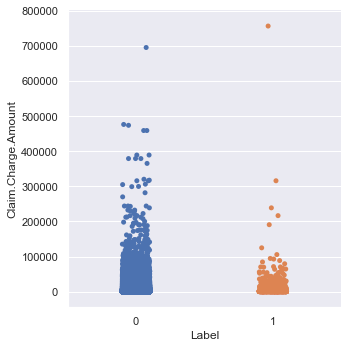

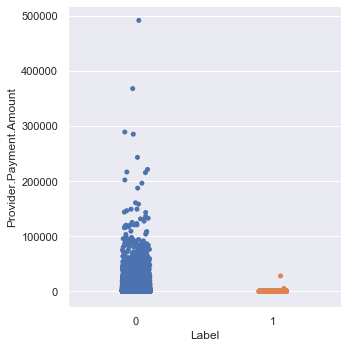

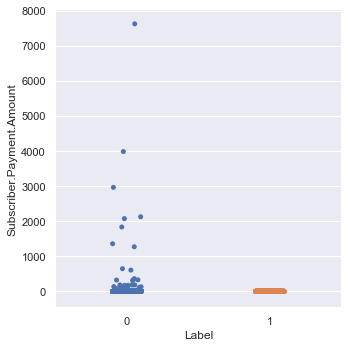

In [0]:
numerical_columns = ["Claim.Charge.Amount", "Provider.Payment.Amount","Subscriber.Payment.Amount"]

print("Total Number of rows where Claim Amount is zero :"+ str(len(df_data[(df_data['Claim.Charge.Amount'] == 0)  ])))
print("Total Number of rows where Provider Payment Amount is zero :"+str(len(df_data[(df_data['Provider.Payment.Amount'] == 0)])))
print("Total Number of rows where Subsriber Payment Amount is zero :"+str(len(df_data[(df_data['Subscriber.Payment.Amount'] == 0)])))

print (df_data.groupby(['Provider.Payment.Amount','Label'])['Label'].count())

print(df_data.groupby(['Label'])['Claim.Charge.Amount'].count())
print(df_data.groupby(['Label'])['Provider.Payment.Amount'].count())
print(df_data.groupby(['Label'])['Subscriber.Payment.Amount'].count())


sns.catplot(x='Label', y='Claim.Charge.Amount', data=df_data)
sns.catplot(x='Label', y='Provider.Payment.Amount', data=df_data)
sns.catplot(x='Label', y='Subscriber.Payment.Amount', data=df_data)

In [0]:
na_count = df_data["Provider.Payment.Amount"].sum()
print(na_count, df_data["Provider.Payment.Amount"].count())
print(df_data["Provider.Payment.Amount"][0])
print(df_data["Provider.Payment.Amount"].isin([0.0]).sum())

141388905.55284 298341
15036.21
201654


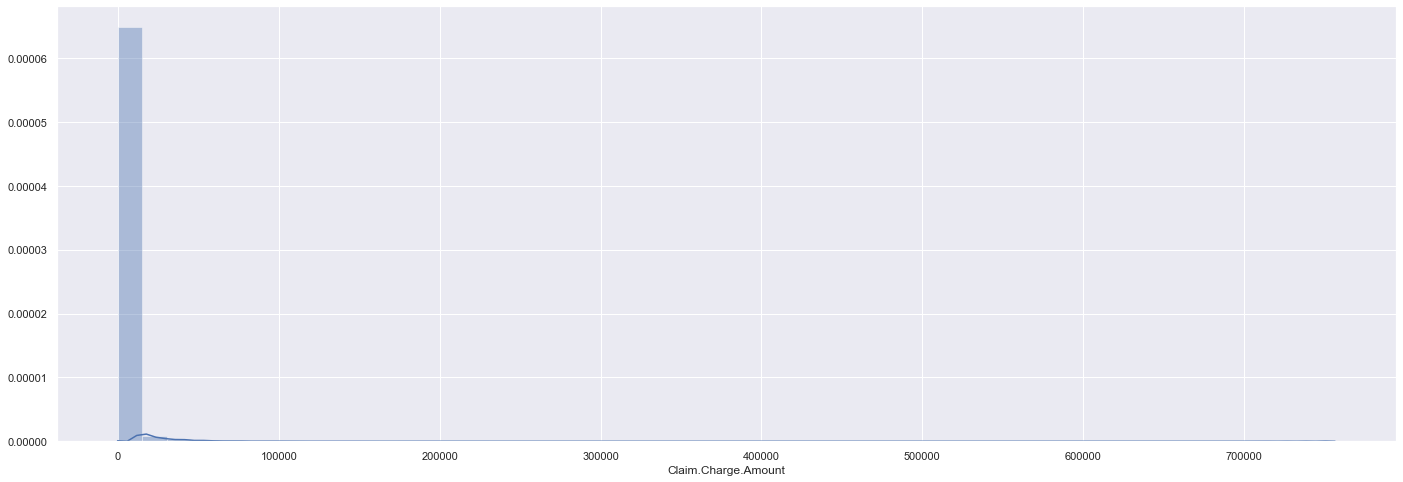

In [0]:
sns.set(rc={'figure.figsize':(24,8)})
sns.distplot(df_data['Claim.Charge.Amount'], kde=True)

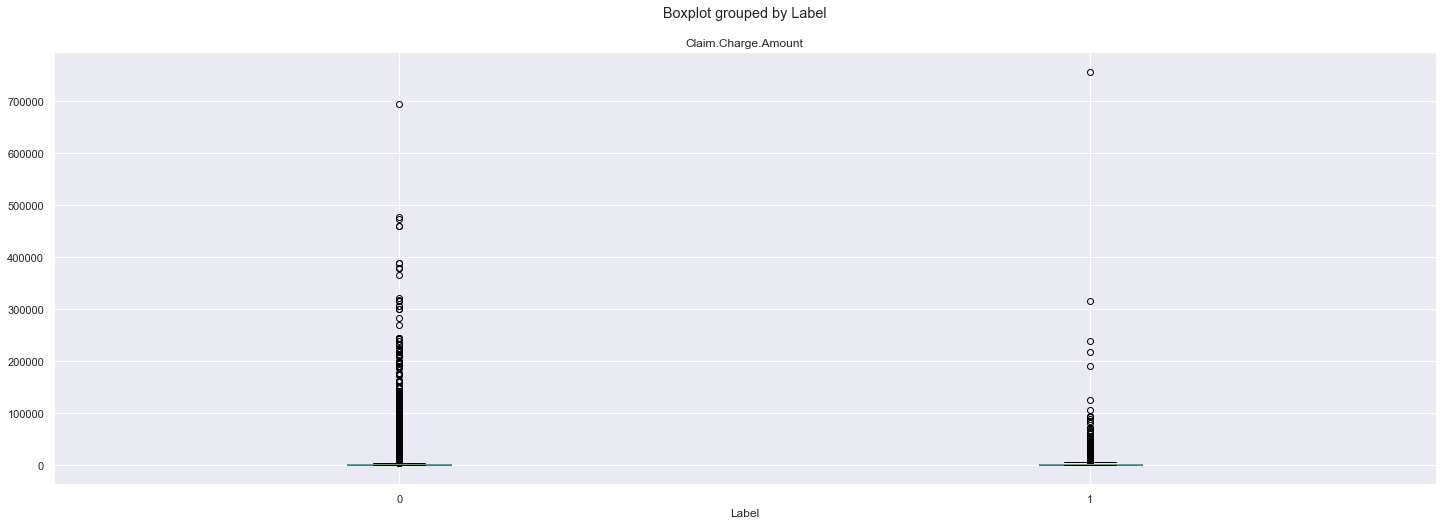

In [0]:
df_data.boxplot('Claim.Charge.Amount','Label', figsize= (24,8))

In [0]:
# Outlier Identification

Q1 = df_data['Claim.Charge.Amount'].quantile(0.25)
Q2 = df_data['Claim.Charge.Amount'].quantile(0.50)
Q3 = df_data['Claim.Charge.Amount'].quantile(0.75)
IQR = Q3 - Q1

df_data = df_data[~( (df_data['Claim.Charge.Amount'] > (Q3 + 1.5 * IQR)) | 
                    (df_data['Claim.Charge.Amount'] < (Q1 - 1.5 * IQR)))]

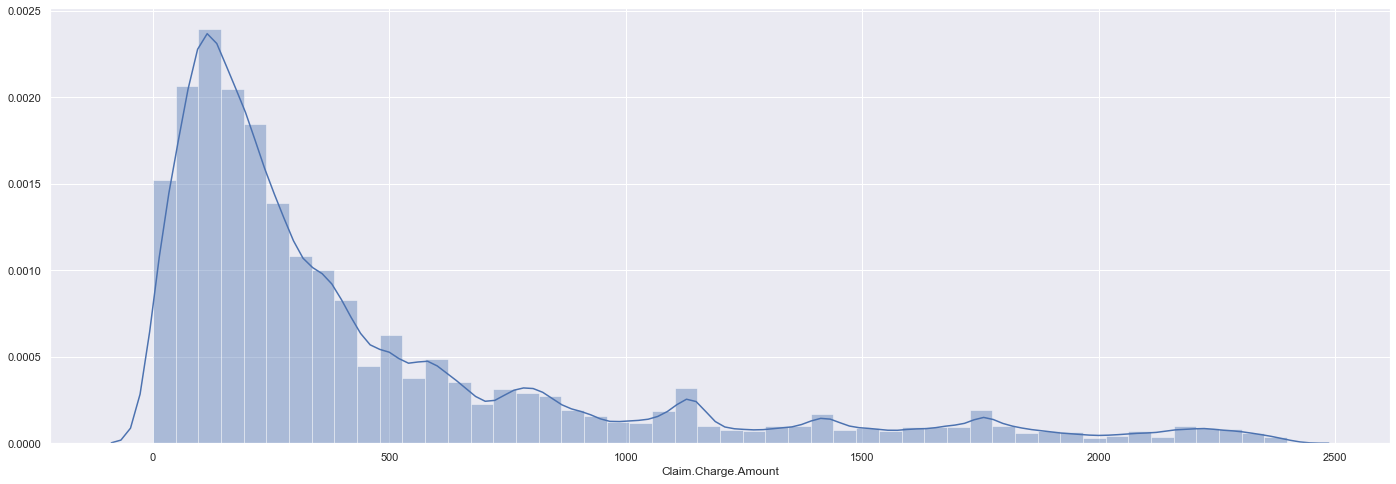

In [0]:
sns.set(rc={'figure.figsize':(24,8)})
sns.distplot(df_data['Claim.Charge.Amount'], kde=True)

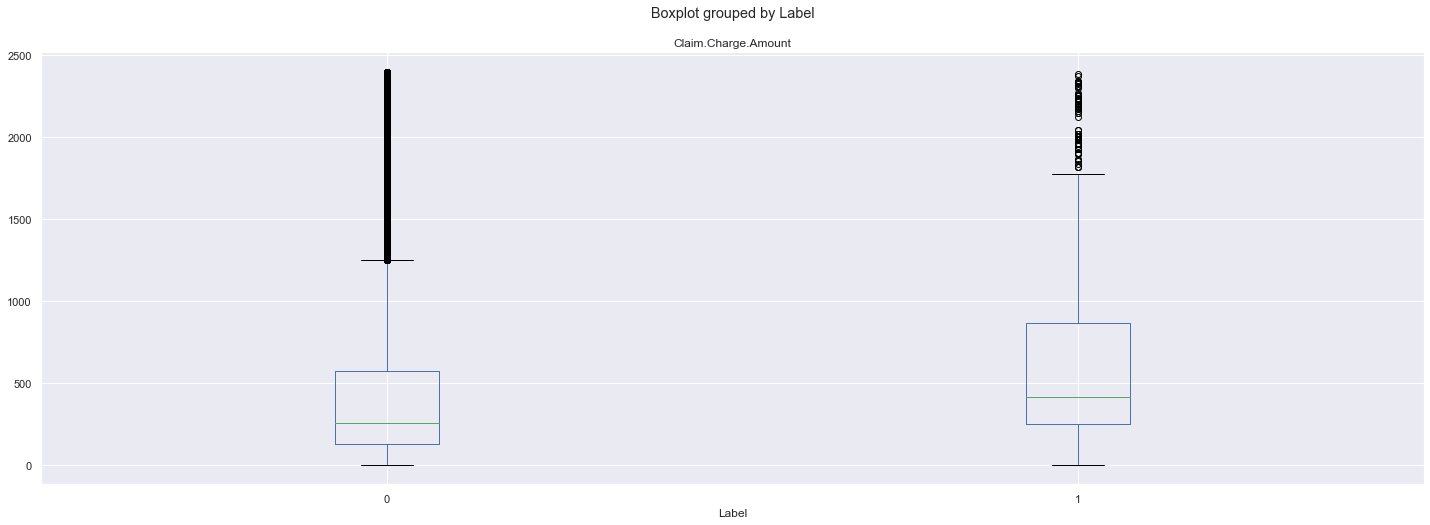

In [0]:
df_data.boxplot('Claim.Charge.Amount','Label', figsize= (24,8))

### Conclusion: Drop outliers and do Normalization for Numerical fields. Subscriber Payment Amount and Provider Payment Amount are mostly zero and so columns should be dropped **

In [0]:
df_data.dtypes

Srlno                               int64
Claim.Number                       object
Claim.Line.Number                  object
Member.ID                          object
Provider.ID                        object
Revenue.Code                       object
Service.Code                       object
Place.Of.Service.Code              object
Procedure.Code                     object
Diagnosis.Code                     object
Claim.Charge.Amount               float64
Denial.Reason.Code                 object
In.Out.Of.Network                  object
Subscriber.Payment.Amount         float64
Provider.Payment.Amount           float64
Claim.Type                         object
Claim.Subscriber.Type              object
Claim.Current.Status               object
Network.ID                         object
Agreement.ID                       object
Label                              object
Claim.Number.Claim.Line.Number     object
Revenue.Code.Group                 object
Service.Code.Group                

In [0]:
print(df_data.groupby(['Label','Denial.Reason.Code'])['Denial.Reason.Code'].count())
print(df_data['Denial.Reason.Code'].unique())
print(df_data['Label'].value_counts())

Label  Denial.Reason.Code
0      104                    38
       17                      3
       18                      1
       19                    175
       2                      16
                            ... 
1      JF1                     1
       JF9                    37
       JG1                     6
       JO5                    62
       JPA                    33
Name: Denial.Reason.Code, Length: 228, dtype: int64
[nan 'F05' 'JA' 'CD0' 'PSR' 'JFI' 'J2M' 'J3E' 'K62' 'N54' 'JB7' 'J5R'
 'PDC' 'S16' 'ST' 'JB8' 'J8G' 'TF1' 'J72' 'F22' 'CDD' 'JRM' 'KDF' 'J2L'
 '511' 'K99' 'JUQ' 'KAO' 'KDR' 'KDP' 'KKB' 'K45' 'K96' 'JLP' 'N91' 'JAQ'
 'N76' 'KKE' 'F13' 'S5' '356' 'JC4' 'JI7' 'F00' 'K54' 'N65' 'JSO' 'KFY'
 'J83' 'S23' 'N93' 'L04' 'PXW' '2' 'JMT' 'KAB' 'KEJ' 'K95' 'J09' 'S9'
 'N55' 'JF1' 'K98' 'JH' 'JNE' 'K69' 'KDS' 'JFN' 'JE1' 'JES' 'N14' '319'
 'N92' 'N94' 'KEO' 'KAL' 'PMP' 'JMV' 'KJW' 'PS2' 'KAN' 'K97' 'JG1' 'KFN'
 'UM0' 'JBI' 'KEX' 'K89' 'K87' 'KCD' 'JQ3' 'JUB' 'JO5' 'K

### Dropping all useless columns not required for Machine learning

In [0]:
columns_tobe_dropped = ['Srlno', 'Revenue.Code', 'Service.Code', 'Diagnosis.Code' , 'Claim.Number', 'Claim.Line.Number', 'Member.ID', 'Provider.ID', 'Network.ID', 'Agreement.ID','Procedure.Code','Place.Of.Service.Code', 'Denial.Reason.Code', 'Claim.Number.Claim.Line.Number', 'Subscriber.Payment.Amount', 'Provider.Payment.Amount']
df_data.drop(columns_tobe_dropped, axis = 1, inplace=True)
# rearrange columns - so label will be in the last column
df_data = df_data[['Claim.Type', 
                   'Claim.Subscriber.Type',
                   'Claim.Current.Status',
                   'Revenue.Code.Group', 
                   'Service.Code.Group', 
                   'Diagnosis.Code.Group', 
                   'Procedure.Code.Group', 
                   'In.Out.Of.Network',
                   'Claim.Charge.Amount',
                   'Label',]]
print(df_data.dtypes)

categorical_columns = ["Claim.Type", "Claim.Subscriber.Type", "Claim.Current.Status","Revenue.Code.Group", "Service.Code.Group", "Diagnosis.Code.Group","Procedure.Code.Group","In.Out.Of.Network", "Label"]
numerical_columns = ["Claim.Charge.Amount"]


Claim.Type                object
Claim.Subscriber.Type     object
Claim.Current.Status      object
Revenue.Code.Group        object
Service.Code.Group        object
Diagnosis.Code.Group      object
Procedure.Code.Group      object
In.Out.Of.Network         object
Claim.Charge.Amount      float64
Label                     object
dtype: object


C:\Parveen\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
### Correlations between Categorical Columns

In [0]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256925 entries, 1 to 472558
Data columns (total 10 columns):
Claim.Type               256925 non-null object
Claim.Subscriber.Type    256925 non-null object
Claim.Current.Status     256925 non-null object
Revenue.Code.Group       256925 non-null object
Service.Code.Group       256925 non-null object
Diagnosis.Code.Group     256925 non-null object
Procedure.Code.Group     256925 non-null object
In.Out.Of.Network        229775 non-null object
Claim.Charge.Amount      256925 non-null float64
Label                    256925 non-null object
dtypes: float64(1), object(9)
memory usage: 21.6+ MB


Claim.Type                object
Claim.Subscriber.Type     object
Claim.Current.Status      object
Revenue.Code.Group        object
Service.Code.Group        object
Diagnosis.Code.Group      object
Procedure.Code.Group      object
In.Out.Of.Network         object
Claim.Charge.Amount      float64
Label                     object
dtype: object
Claim.Type                 int32
Claim.Subscriber.Type      int32
Claim.Current.Status       int32
Revenue.Code.Group         int32
Service.Code.Group         int32
Diagnosis.Code.Group       int32
Procedure.Code.Group       int32
In.Out.Of.Network          int32
Claim.Charge.Amount      float64
Label                     object
dtype: object
0    255388
1      1537
Name: Label, dtype: int64


,Claim.Type,Claim.Subscriber.Type,Claim.Current.Status,Revenue.Code.Group,Service.Code.Group,Diagnosis.Code.Group,Procedure.Code.Group,In.Out.Of.Network,Claim.Charge.Amount,Label
Claim.Type,1.000000,0.006877,0.458065,-0.136146,0.027406,0.029640,-0.062022,0.070437,-0.024263,0.021507
Claim.Subscriber.Type,0.006877,1.000000,0.027426,0.074804,0.038249,0.002652,0.006850,0.059309,-0.001709,0.032687
Claim.Current.Status,0.458065,0.027426,1.000000,-0.059113,0.045590,0.008459,-0.012119,0.230074,-0.013764,0.005181
Revenue.Code.Group,-0.136146,0.074804,-0.059113,1.000000,0.263560,0.026911,0.011424,0.025133,0.058334,-0.149788
Service.Code.Group,0.027406,0.038249,0.045590,0.263560,1.000000,-0.024351,0.001031,0.092514,0.088046,-0.070541
Diagnosis.Code.Group,0.029640,0.002652,0.008459,0.026911,-0.024351,1.000000,-0.005642,0.016768,0.085243,-0.101178
Procedure.Code.Group,-0.062022,0.006850,-0.012119,0.011424,0.001031,-0.005642,1.000000,0.019809,0.115994,0.018782
In.Out.Of.Network,0.070437,0.059309,0.230074,0.025133,0.092514,0.016768,0.019809,1.000000,-0.017030,-0.024798
Claim.Charge.Amount,-0.024263,-0.001709,-0.013764,0.058334,0.088046,0.085243,0.115994,-0.017030,1.000000,0.029877
Label,0.021507,0.032687,0.005181,-0.149788,-0.070541,-0.101178,0.018782,-0.024798,0.029877,1.000000


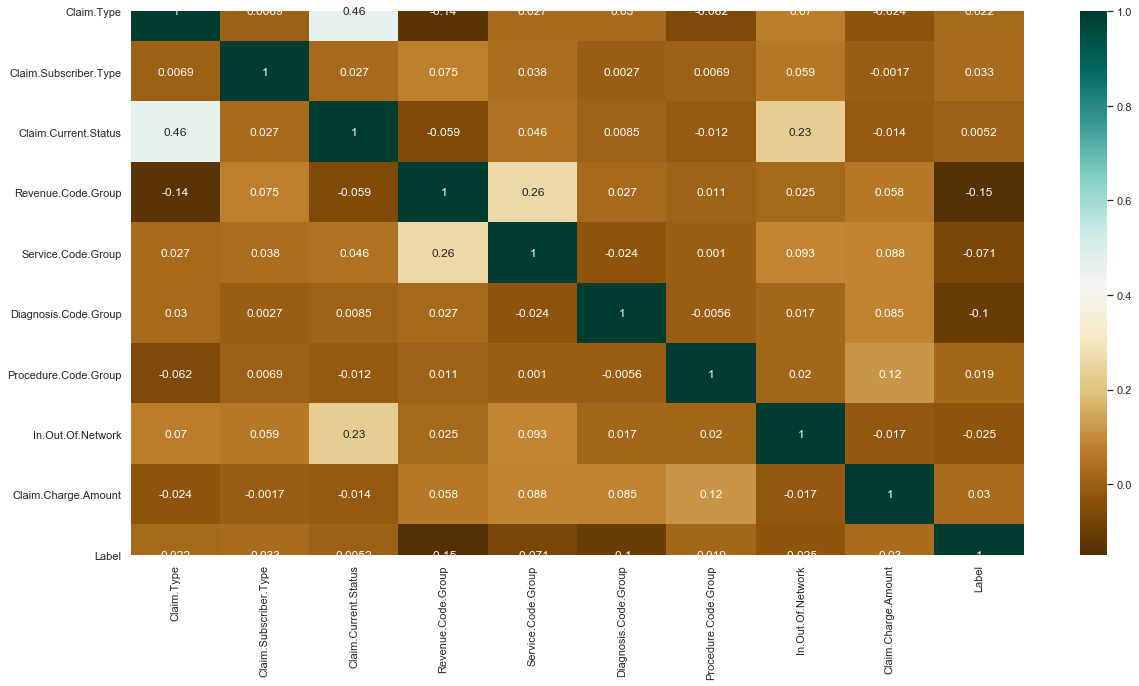

In [0]:
df_data.loc[df_data['In.Out.Of.Network'].isnull(),'In.Out.Of.Network'] = 'Others'

df_lblenc_data = df_data.copy()

# Label Encoding
print(df_lblenc_data.dtypes)
categorical_columns = ["Claim.Type", "Claim.Subscriber.Type", "Claim.Current.Status","Revenue.Code.Group", 
                       "Service.Code.Group", "Diagnosis.Code.Group","Procedure.Code.Group", "In.Out.Of.Network",
                       "Label"]
encoder = LabelEncoder()
cols=['Claim.Type',
      'Claim.Subscriber.Type',
      'Claim.Current.Status',
      'Revenue.Code.Group',
      'Service.Code.Group',
      'Diagnosis.Code.Group',
      'Procedure.Code.Group',
      'In.Out.Of.Network']


for col in cols: 
#    print("here",col)
    df_lblenc_data[col] = encoder.fit_transform(df_lblenc_data[col])
    
    
df_lblenc_data.head()
print(df_lblenc_data.dtypes)
print(df_lblenc_data['Label'].value_counts())
distLabels = (df_lblenc_data['Label'].value_counts()/ df_lblenc_data['Label'].count())*100
# Label Encoding


for col in categorical_columns: 
    df_lblenc_data[col] = df_lblenc_data[col].astype('int')
    
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
data_corr = df_lblenc_data.corr()
sns.heatmap(data_corr, cmap="BrBG", annot=True)
data_corr

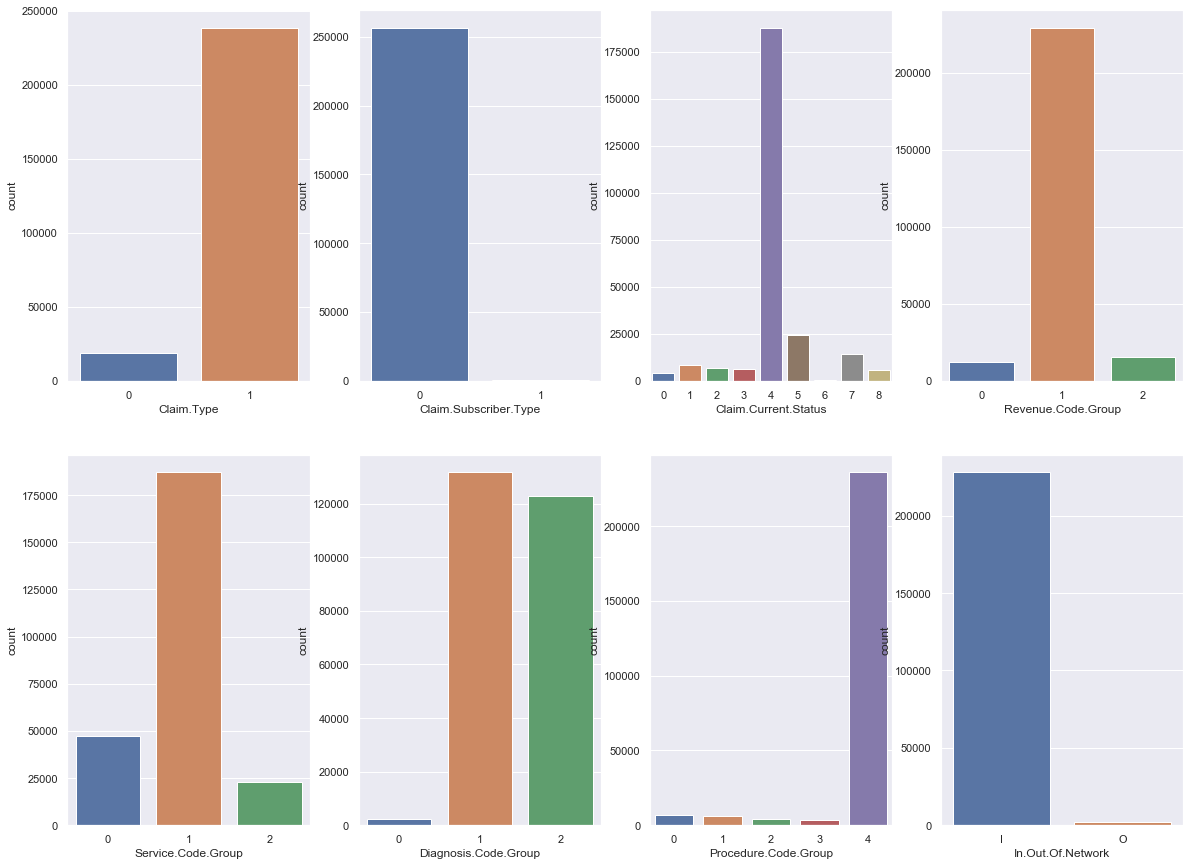

In [0]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(df_lblenc_data[variable], ax=subplot) 

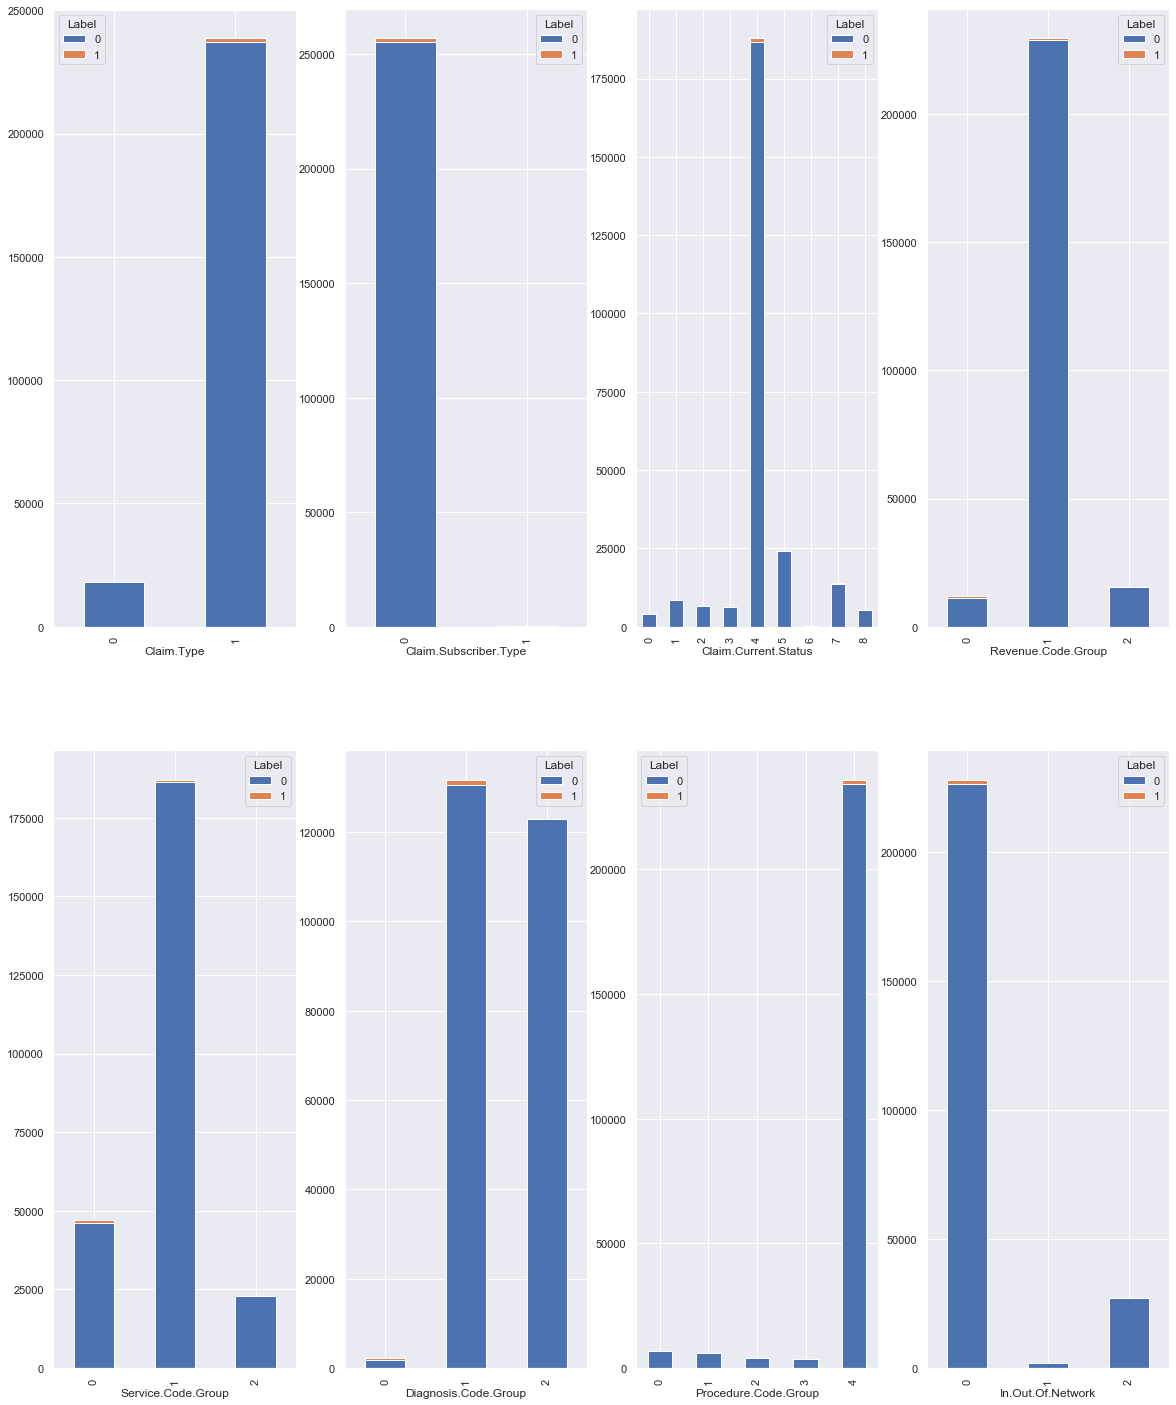

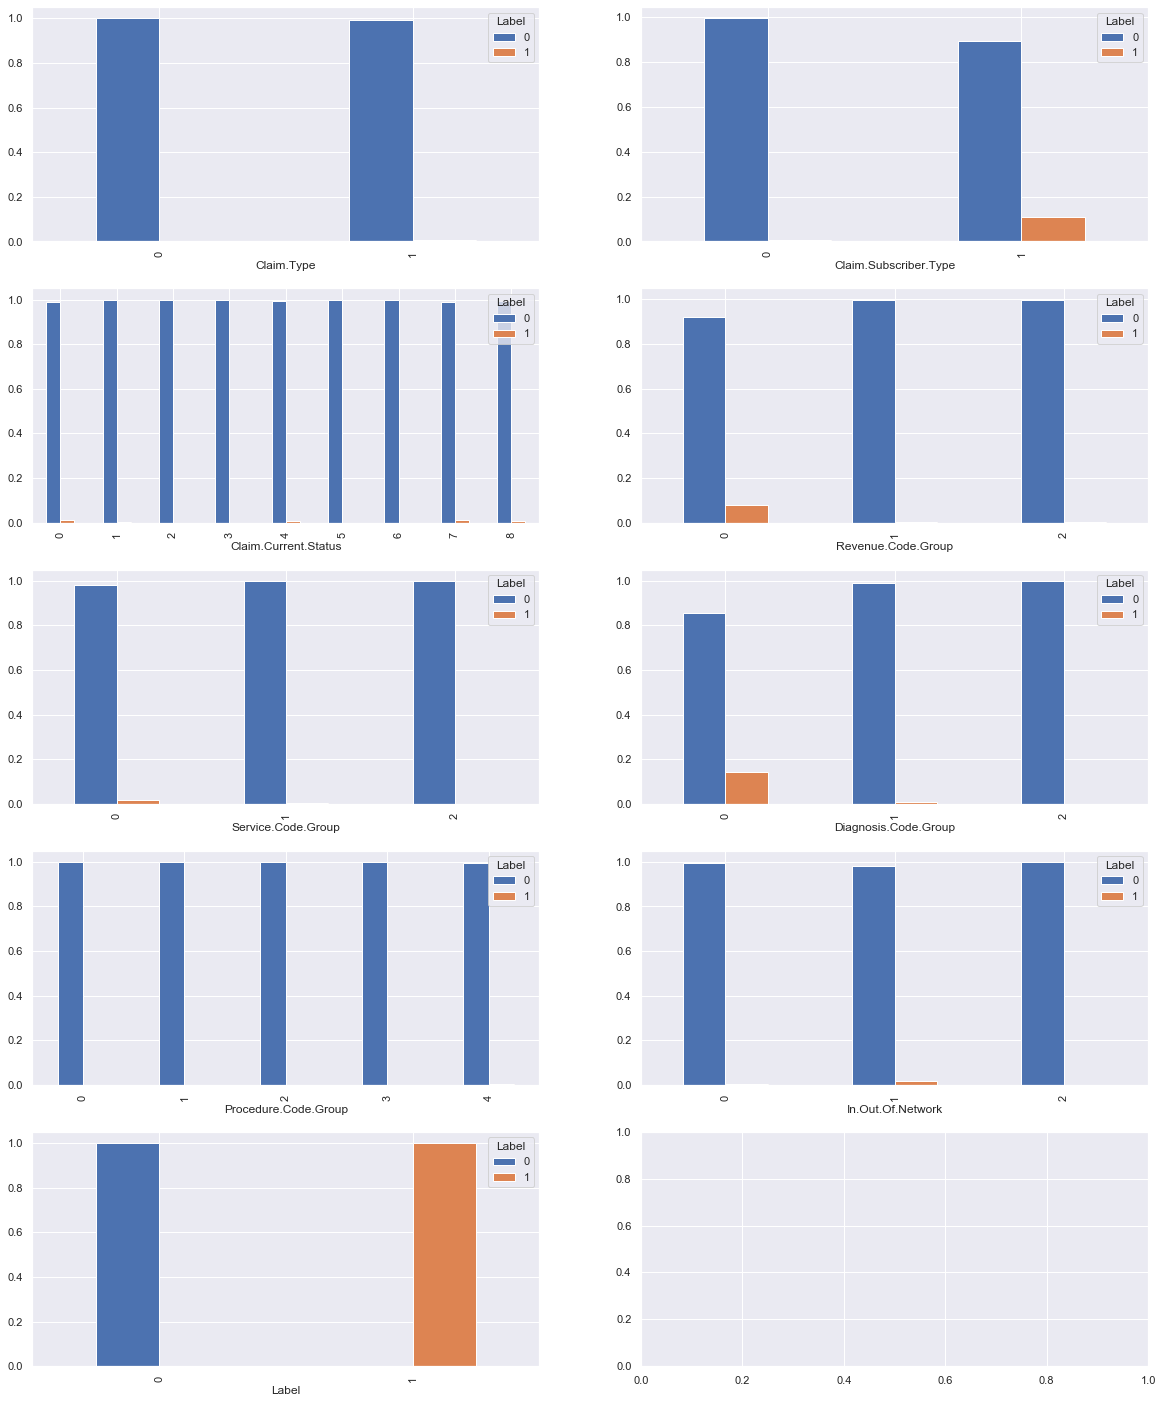

In [0]:
# Compare categorical variable with 'Label'
fig, ax = plt.subplots(2, 4, figsize=(20, 25))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    pd.crosstab(df_lblenc_data[variable], df_lblenc_data['Label']).plot(kind='bar', ax=subplot, stacked=True)

fig, ax = plt.subplots(5, 2, figsize=(20, 25))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    myplot = pd.crosstab(df_lblenc_data[variable], df_lblenc_data['Label'],normalize='index').plot(kind='bar', ax=subplot, stacked=False)


### Binary Encoding Catgeorical Columns

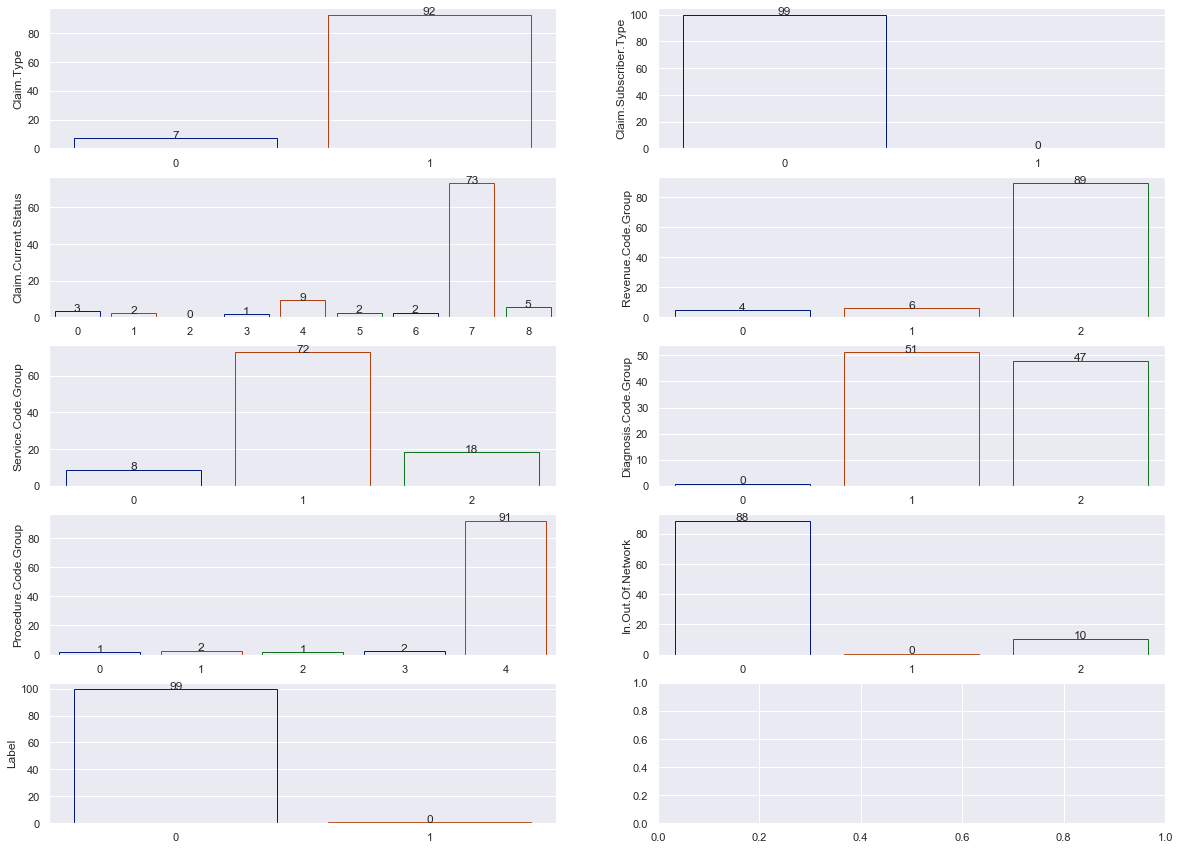

In [0]:
fig, ax = plt.subplots(5, 2, figsize=(20, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    myplot = sns.barplot(x=df_lblenc_data[variable].unique(), y=100*df_lblenc_data[variable].value_counts()/len(df_lblenc_data[variable]),edgecolor=sns.color_palette("dark", 3),facecolor=(0, 0, 0, 0),ax=subplot)
    show_values_on_bars(myplot, "v", 0.5)

In [0]:
# Binary Encoding
print(df_data.dtypes)
df_pre_cat_data = df_data.copy()
categorical_columns = ["Claim.Type", "Claim.Subscriber.Type", "Claim.Current.Status","Revenue.Code.Group", 
                       "Service.Code.Group", "Diagnosis.Code.Group","Procedure.Code.Group","In.Out.Of.Network", 
                       "Label"]

encoder = BinaryEncoder(cols=['Claim.Type',
                              'Claim.Subscriber.Type',
                              'Claim.Current.Status',
                              'Revenue.Code.Group',
                              'Service.Code.Group',
                              'Diagnosis.Code.Group',
                              'Procedure.Code.Group',
                              'In.Out.Of.Network'])
df_data = encoder.fit_transform(df_data)
df_data.head()
print(df_data.dtypes)
print(df_data['Label'].value_counts())
distLabels = (df_data['Label'].value_counts()/ df_data['Label'].count())*100

Claim.Type                object
Claim.Subscriber.Type     object
Claim.Current.Status      object
Revenue.Code.Group        object
Service.Code.Group        object
Diagnosis.Code.Group      object
Procedure.Code.Group      object
In.Out.Of.Network         object
Claim.Charge.Amount      float64
Label                     object
dtype: object
Claim.Type_0                 int64
Claim.Type_1                 int64
Claim.Subscriber.Type_0      int64
Claim.Subscriber.Type_1      int64
Claim.Current.Status_0       int64
Claim.Current.Status_1       int64
Claim.Current.Status_2       int64
Claim.Current.Status_3       int64
Claim.Current.Status_4       int64
Revenue.Code.Group_0         int64
Revenue.Code.Group_1         int64
Revenue.Code.Group_2         int64
Service.Code.Group_0         int64
Service.Code.Group_1         int64
Service.Code.Group_2         int64
Diagnosis.Code.Group_0       int64
Diagnosis.Code.Group_1       int64
Diagnosis.Code.Group_2       int64
Procedure.Code.Group_0    

# This completes the Data Cleaning Activities and the new dataset file needs to be shared with the Client for confirmation before doing the Machine Learning Actvities.

In [0]:
df_data.info()
df_data.to_csv(cleanFile,index=False)
df_pre_cat_data.to_csv(cleanNoCatFile,index=False)
df_data_clean = df_data.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256925 entries, 1 to 472558
Data columns (total 27 columns):
Claim.Type_0               256925 non-null int64
Claim.Type_1               256925 non-null int64
Claim.Subscriber.Type_0    256925 non-null int64
Claim.Subscriber.Type_1    256925 non-null int64
Claim.Current.Status_0     256925 non-null int64
Claim.Current.Status_1     256925 non-null int64
Claim.Current.Status_2     256925 non-null int64
Claim.Current.Status_3     256925 non-null int64
Claim.Current.Status_4     256925 non-null int64
Revenue.Code.Group_0       256925 non-null int64
Revenue.Code.Group_1       256925 non-null int64
Revenue.Code.Group_2       256925 non-null int64
Service.Code.Group_0       256925 non-null int64
Service.Code.Group_1       256925 non-null int64
Service.Code.Group_2       256925 non-null int64
Diagnosis.Code.Group_0     256925 non-null int64
Diagnosis.Code.Group_1     256925 non-null int64
Diagnosis.Code.Group_2     256925 non-null int64
Procedu

In [0]:
#import os
#os.remove(pklFile)
#
print("Pickling the Data Frame")
df_data.to_pickle(pklFile)
print("Pickled the Data Frame")

Pickling the Data Frame
Pickled the Data Frame
